In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
csvfile = 'DataFiles/FDNY/Geoid_Count2017_18.csv'
data = pd.read_csv(csvfile)

Season = [['03','04','05'],['06','07','08'],['09','10','11'],['12','01','02']]
Season_word = ['Spring','Summer','Autumn','Winter']
Month_data = pd.DataFrame(columns = ['Geoid','Spring','Summer','Autumn','Winter']) # create a new Dataframe with each month
info = np.array(['36005046201','36047091000'])
Spring_Count = np.array([0,0])
Summer_Count = np.array([0,0])
Autumn_Count = np.array([0,0])
Winter_Count = np.array([0,0])

for row in range(0,len(data)): 
        
    detail = str(data.iat[row,1])
                     
    if detail in info:                          # if the string already exist, we will just increment the count
        itemindex = np.where(info == detail)
    else:                                       # else we will have to add the string to info array and create an extra count
        info = np.append(info,detail)
        Spring_Count = np.append(Spring_Count,0)
        Summer_Count = np.append(Summer_Count,0)
        Autumn_Count = np.append(Autumn_Count,0)
        Winter_Count = np.append(Winter_Count,0)
        itemindex = np.where(info == detail)
        
    if data.iat[row,0][0:2] == '03' or data.iat[row,0][0:2] == '04' or data.iat[row,0][0:2] == '05':
        Spring_Count[itemindex[0][0]] += data.iat[row,2]
    elif data.iat[row,0][0:2] == '06' or data.iat[row,0][0:2] == '07' or data.iat[row,0][0:2] == '08':
        Summer_Count[itemindex[0][0]] += data.iat[row,2]
    elif data.iat[row,0][0:2] == '09' or data.iat[row,0][0:2] == '10' or data.iat[row,0][0:2] == '11':
        Autumn_Count[itemindex[0][0]] += data.iat[row,2]
    elif data.iat[row,0][0:2] == '12' or data.iat[row,0][0:2] == '01' or data.iat[row,0][0:2] == '02':
        Winter_Count[itemindex[0][0]] += data.iat[row,2]
    
for row in range(0,len(info)):
    Month_data = Month_data.append({'Geoid' : info[row], 'Spring' : Spring_Count[row],  'Summer': Summer_Count[row], 'Autumn' : Autumn_Count[row], 'Winter' : Winter_Count[row] } , ignore_index=True)
print(Month_data)

            Geoid Spring Summer Autumn Winter
0     36005046201     77     97     99     77
1     36047091000     37     62     71     51
2     36047089000     10     11     12     14
3     36081043701      1      2      1      5
4     36005022403      7      8      8     15
...           ...    ...    ...    ...    ...
2033  36085022300      0      0      0      1
2034  36119010300      0      0      0      1
2035  36081120300      0      0      0      1
2036  36081077300      0      0      0      1
2037  36047052800      0      0      0      1

[2038 rows x 5 columns]


In [4]:
Month_data.to_csv('DataFiles/FDNY/Season2017_18.csv', encoding='utf-8',index=False)

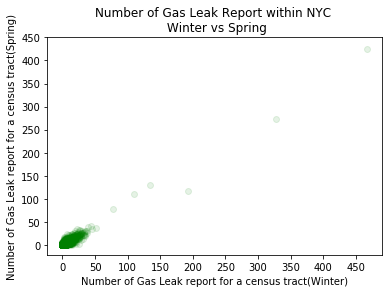

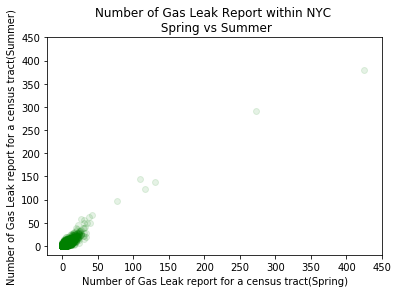

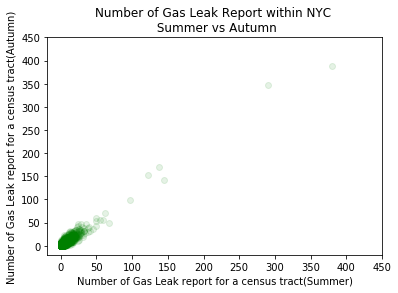

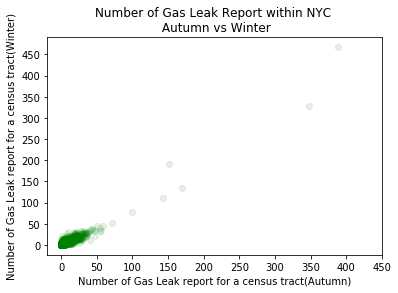

In [18]:
Spring = Month_data.Spring.values
Summer = Month_data.Summer.values
Autumn = Month_data.Autumn.values
Winter = Month_data.Winter.values
vmin = 0
vmax = 500
step = 50


plt.scatter(Winter,Spring, color='Green',alpha = 0.1)
plt.xlabel('Number of Gas Leak report for a census tract(Winter)')
plt.ylabel('Number of Gas Leak report for a census tract(Spring)')
plt.title('Number of Gas Leak Report within NYC \n Winter vs Spring')
plt.yticks(np.arange(vmin, vmax, step))
plt.xticks(np.arange(vmin, vmax, step))
plt.show()

plt.scatter(Spring,Summer, color='Green',alpha = 0.1)
plt.xlabel('Number of Gas Leak report for a census tract(Spring)')
plt.ylabel('Number of Gas Leak report for a census tract(Summer)')
plt.title('Number of Gas Leak Report within NYC \n Spring vs Summer')
plt.yticks(np.arange(vmin, vmax, step))
plt.xticks(np.arange(vmin, vmax, step))
plt.show()

plt.scatter(Summer,Autumn, color='Green',alpha = 0.1)
plt.xlabel('Number of Gas Leak report for a census tract(Summer)')
plt.ylabel('Number of Gas Leak report for a census tract(Autumn)')
plt.title('Number of Gas Leak Report within NYC \n Summer vs Autumn')
plt.yticks(np.arange(vmin, vmax, step))
plt.xticks(np.arange(vmin, vmax, step))
plt.show()

plt.scatter(Autumn,Winter, color='Green',alpha = 0.1)
plt.xlabel('Number of Gas Leak report for a census tract(Autumn)')
plt.ylabel('Number of Gas Leak report for a census tract(Winter)')
plt.title('Number of Gas Leak Report within NYC \n Autumn vs Winter')
plt.yticks(np.arange(vmin, vmax, step))
plt.xticks(np.arange(vmin, vmax, step))
plt.show()

In [9]:
df = pd.read_csv('DataFiles/FDNY/Season2017_18.csv')
print(df)

            Geoid  Spring  Summer  Autumn  Winter
0     36005046201      77      97      99      77
1     36047091000      37      62      71      51
2     36047089000      10      11      12      14
3     36081043701       1       2       1       5
4     36005022403       7       8       8      15
...           ...     ...     ...     ...     ...
2033  36085022300       0       0       0       1
2034  36119010300       0       0       0       1
2035  36081120300       0       0       0       1
2036  36081077300       0       0       0       1
2037  36047052800       0       0       0       1

[2038 rows x 5 columns]


In [22]:
for i in range(0,len(df)):
    sum = df.at[i,'Spring'] + df.at[i,'Summer'] + df.at[i,'Autumn']+df.at[i,'Winter']
    if sum > 150:
        print(df.loc[[i]])

         Geoid  Spring  Summer  Autumn  Winter
0  36005046201      77      97      99      77
         Geoid  Spring  Summer  Autumn  Winter
1  36047091000      37      62      71      51
          Geoid  Spring  Summer  Autumn  Winter
25  36005005100      35      49      59      45
          Geoid  Spring  Summer  Autumn  Winter
26  36047031300     272     291     348     328
          Geoid  Spring  Summer  Autumn  Winter
27  36005023800     131     137     170     134
          Geoid  Spring  Summer  Autumn  Winter
31  36061016200      26      59      56      33
          Geoid  Spring  Summer  Autumn  Winter
54  36081124700     424     380     388     467
          Geoid  Spring  Summer  Autumn  Winter
58  36061016900     110     145     143     110
          Geoid  Spring  Summer  Autumn  Winter
69  36085027900     116     122     152     192
          Geoid  Spring  Summer  Autumn  Winter
83  36005030200      42      67      50      44
          Geoid  Spring  Summer  Autumn  Win

In [ ]:
# create scatter plot per capita
#create scatter plot for unemployment rate and poverty rate with normalize number
# of report per capita